# Project: Wrangling and Analyze Data

## Table of Contents
* [Importing required packages](#chapter1)
* [Data Gathering](#chapter2)
    * [Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)](#section_2_1)
    * [Use the Requests library to download the tweet image prediction (image_predictions.tsv)](#section_2_2)
    * [Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)](#sub_section_2_3)
* [Assessing Data](#chapter3)
    * [Quality issues](#section_3_1)
    * [Tidiness issues](#section_3_2)
* [Cleaning Data](#chapter4)
    * [Tidiness issues](#section_4_2)
        * [Issue#1](#section_4_1_3)
            * [Define](#section_4_1_3_1)
            * [Code](#section_4_1_3_2)
            * [Test](#section_4_1_3_3)
    * [Quality issues](#section_4_1)
        * [Issue#1](#section_4_1_1)
            * [Define](#section_4_1_1)
            * [Code](#section_4_1_1_2)
            * [Test](#section_4_1_1_3)
        * [Issue#2](#section_4_1_2)
            * [Define](#section_4_1_2_1)
            * [Code](#section_4_1_2_2)
            * [Test](#section_4_1_2_3)
        * [Issue#3](#section_4_1_9)
            * [Define](#section_4_1_9_1)
            * [Code](#section_4_1_9_2)
            * [Test](#section_4_1_9_3)
        * [Issue#4](#section_4_1_4)
            * [Define](#section_4_1_4_1)
            * [Code](#section_4_1_4_2)
            * [Test](#section_4_1_4_3)
        * [Issue#5](#section_4_1_5)
            * [Define](#section_4_1_5_1)
            * [Code](#section_4_1_5_2)
            * [Test](#section_4_1_5_3)
        * [Issue#6](#section_4_1_6)
            * [Define](#section_4_1_6_1)
            * [Code](#section_4_1_6_2)
            * [Test](#section_4_1_6_3)
        * [Issue#7](#section_4_1_7)
            * [Define](#section_4_1_7_1)
            * [Code](#section_4_1_7_2)
            * [Test](#section_4_1_7_3)
        * [Issue#8](#section_4_1_8)
            * [Define](#section_4_1_8_1)
            * [Code](#section_4_1_8_2)
            * [Test](#section_4_1_8_3)
        * [Issue#9](#section_4_1_10)
            * [Define](#section_4_2_1)
            * [Code](#section_4_2_2)
            * [Test](#section_4_2_3)
* [Storing Data](#chapter_5)
* [Analyzing and Visualizing Data](#chapter_6)

## Importing required packages<a class="anchor" id="chapter1"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import requests as rq
import os
%matplotlib inline 

## Data Gathering <a class="anchor" id="chapter2"></a>
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) <a class="anchor" id="section_2_1"></a>

In [3]:
WeRateDogs = pd.read_csv('twitter-archive-enhanced.csv')
WeRateDogs.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv) <a class="anchor" id="section_2_2"></a>

In [4]:
folder_name = 'twitter_images'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = rq.get(url)
response

<Response [200]>

In [6]:
tweetimages=pd.read_csv('image-predictions.tsv',sep="\t")
tweetimages.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt) <a class="anchor" id="section_2_3"></a>

In [8]:
import json

twitterjson = [json.loads(line) for line in open('tweet-json.txt','r')]
#print(twit)
print(type(twitterjson))

tweet_json=pd.DataFrame(twitterjson)

tweet_json.head()

<class 'list'>


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


## Assessing Data <a class="anchor" id="chapter3"></a>
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
WeRateDogs.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [10]:
WeRateDogs.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
WeRateDogs['tweet_id'].duplicated().sum()

0

In [12]:
WeRateDogs.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [13]:
WeRateDogs.floofer.unique()

array(['None', 'floofer'], dtype=object)

In [14]:
WeRateDogs.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [15]:
WeRateDogs.puppo.unique()

array(['None', 'puppo'], dtype=object)

In [16]:
WeRateDogs.query('text.str.contains("RT")')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,678399652199309312,NaN,NaN,2015-12-20 02:20:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This made my day. 12/10 please enjoy https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678399652...,12,10,None,None,None,None,None
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None
1991,672622327801233409,NaN,NaN,2015-12-04 03:43:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This lil pupper is sad because we haven't foun...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672622327...,12,10,None,None,None,pupper,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [17]:
tweetimages.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [18]:
tweetimages['tweet_id'].duplicated().sum()

0

In [19]:
tweetimages.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [21]:
tweet_json.dtypes

created_at                        object
id                                 int64
id_str                            object
full_text                         object
truncated                           bool
display_text_range                object
entities                          object
extended_entities                 object
source                            object
in_reply_to_status_id            float64
in_reply_to_status_id_str         object
in_reply_to_user_id              float64
in_reply_to_user_id_str           object
in_reply_to_screen_name           object
user                              object
geo                               object
coordinates                       object
place                             object
contributors                      object
is_quote_status                     bool
retweet_count                      int64
favorite_count                     int64
favorited                           bool
retweeted                           bool
possibly_sensiti

In [22]:
tweet_json.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000,8.860534e+17


In [23]:
tweet_json.is_quote_status.unique()

array([False,  True])

In [24]:
tweet_json.favorited.unique()

array([False,  True])

In [25]:
tweet_json.retweeted.unique()

array([False])

In [26]:
tweet_json.possibly_sensitive.unique()

array([False, nan], dtype=object)

### Quality issues <a class="anchor" id="section_3_1"></a>
 1. remove the tweets with 'RT' in it's begining from WeRateDogs

 2. keep only the tweets that has dog in either 1 of the 3 photos in tweetimages
 
 3. Columns in Tweet-Json related to retweets is not required as we don't need retweets so we'll remove

 4. Columns in Tweet-Json is repeated one time integer and another string , whcih we need to make it only 1 type

 5. As described in the project overview the rating_numerator should be greater than the denominator so we are making it   applicable by multipying with 10 

 6. denominator in WeRateDogs can't be 0 as this will make issue so we need to update it to 10 as the default value 

 7. We need to join data together so we can remove not dogs Tweets  and keep only what we intersted in 

 8. Find the correct name for the dogs with Name 'None' or 'a'
 9. Time STamp , created_dt need to be changed. to datetime in WeRateDogs

### Tidiness issues <a class="anchor" id="section_3_2"></a>
 1. Time STamp need to be changed. to datetime in WeRateDogs

 2. change created_dt to date instead of object

 3. Having Pivot column for the dog type instead of 4 columns as each dog is only 1 of the 4 types 


## Cleaning Data <a class="anchor" id="chapter4"></a>
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [27]:
# Make copies of original pieces of data
tweet_json_clean=tweet_json.copy()
tweetimages_clean=tweetimages.copy()
WeRateDogs_clean=WeRateDogs.copy()

### Tidiness issues <a class="anchor" id="section_4_2"></a>


###  Issue #1: <a class="anchor" id="section_4_1_3"></a>

#### Define <a class="anchor" id="section_4_1_3_1"></a>

Having Pivot column for the dog type instead of 4 columns as each dog is only 1 of the 4 types in WeRateDogs

#### Code <a class="anchor" id="section_4_1_3_2"></a>

In [28]:
WeRateDogs_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [29]:
# First replace None in stage columns with empty string as follows.
WeRateDogs_clean.doggo.replace(to_replace='None', value='',inplace=True)  
WeRateDogs_clean.floofer.replace(to_replace='None', value='',inplace=True)  
WeRateDogs_clean.pupper.replace(to_replace='None',value= '',inplace=True)  
WeRateDogs_clean.puppo.replace(to_replace='None', value='',inplace=True)

WeRateDogs_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,


In [30]:
# Then combine stage columns.
WeRateDogs_clean['dog_type'] = WeRateDogs_clean.doggo + WeRateDogs_clean.floofer + WeRateDogs_clean.pupper + WeRateDogs_clean.puppo

In [31]:
#Check the unique Values for Dog_type
WeRateDogs_clean.dog_type.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [32]:
WeRateDogs_clean.loc[WeRateDogs_clean.dog_type == 'doggopupper', 'dog_type'] = 'doggo,pupper' 
WeRateDogs_clean.loc[WeRateDogs_clean.dog_type == 'doggopuppo', 'dog_type'] = 'doggo,puppo' 
WeRateDogs_clean.loc[WeRateDogs_clean.dog_type == 'doggofloofer', 'dog_type'] = 'doggo,floofer'

WeRateDogs_clean[WeRateDogs_clean['dog_type']=='doggo,floofer']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,,,"doggo,floofer"


In [33]:
    WeRateDogs_clean.drop(columns=['doggo','floofer','puppo','pupper'],inplace=True)

In [34]:
WeRateDogs_clean.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
dog_type                       object
dtype: object

#### Test: <a class="anchor" id="section_4_1_3_3"></a>

In [35]:
WeRateDogs_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
836,767884188863397888,NaN,NaN,2016-08-23 00:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tito. He's on the lookout. Nobody know...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/767884188...,10,10,Tito,
1075,739623569819336705,NaN,NaN,2016-06-06 01:02:55 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a doggo that don't need no human. 12/10...,NaN,NaN,NaN,https://vine.co/v/iY9Fr1I31U6,12,10,None,doggo
1256,710588934686908417,NaN,NaN,2016-03-17 22:09:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Beemo. He's a Chubberflop mix. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710588934...,12,10,Beemo,
247,845459076796616705,NaN,NaN,2017-03-25 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a heartwarming scene of ...,7.562885e+17,4.196984e+09,2016-07-22 00:43:32 +0000,https://twitter.com/dog_rates/status/756288534...,12,10,None,
2082,670815497391357952,NaN,NaN,2015-11-29 04:04:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sage. He likes to burn shit. 10/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670815497...,10,10,Sage,
1312,707014260413456384,NaN,NaN,2016-03-08 01:25:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie. She requests to be carried arou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707014260...,11,10,Ellie,
93,874057562936811520,NaN,NaN,2017-06-12 00:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I can't believe this keeps happening. This, is...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/874057562...,12,10,None,
86,875747767867523072,NaN,NaN,2017-06-16 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Goose. He's a womanizer. Cheeky as h*c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875747767...,13,10,Goose,
1099,735991953473572864,NaN,NaN,2016-05-27 00:32:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maxaroni. He's curly af. Also rather f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735991953...,11,10,Maxaroni,
761,778286810187399168,NaN,NaN,2016-09-20 17:36:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. He has too much skin. Isn't h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778286810...,11,10,Stanley,


### Quality Issues: <a class="anchor" id="section_4_1"></a>

### Issue #1: <a class="anchor" id="section_4_1_1"></a>

#### Define:<a class="anchor" id="section_4_1_1_1"></a>
Remove the tweets with 'RT' in it's begining from WeRateDogs

#### Code <a class="anchor" id="section_4_1_1_2"></a>

In [36]:
#Create List with tweets that HAs RT in the begining 
rt_list=WeRateDogs_clean.query('text.str.contains("RT")')['tweet_id']

# Exclude those Tweets from the DataFrame we are working with 
WeRateDogs_clean=WeRateDogs_clean[~WeRateDogs_clean.tweet_id.isin(rt_list)]
WeRateDogs_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.164000e+03,7.800000e+01,7.800000e+01,0.0,0.0,2164.000000,2164.000000
mean,7.371741e+17,7.455079e+17,2.014171e+16,NaN,NaN,13.226433,10.495379
std,6.753662e+16,7.582492e+16,1.252797e+17,NaN,NaN,47.846578,7.036821
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,0.000000,0.000000
25%,6.768214e+17,6.757419e+17,3.086374e+08,NaN,NaN,10.000000,10.000000
50%,7.097095e+17,7.038708e+17,4.196984e+09,NaN,NaN,11.000000,10.000000
75%,7.896066e+17,8.257804e+17,4.196984e+09,NaN,NaN,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,NaN,NaN,1776.000000,170.000000


#### Test <a class="anchor" id="section_4_1_1_3"></a>

In [37]:
WeRateDogs_clean.query('text.str.contains("RT")')['tweet_id']

Series([], Name: tweet_id, dtype: int64)

### Issue #2: <a class="anchor" id="section_4_1_2"></a>

#### Define <a class="anchor" id="section_4_1_2_1"></a>

keep only the tweets that has dog in either 1 of the 3 photos in tweetimages

#### Code <a class="anchor" id="section_4_1_2_2"></a>

In [38]:
# keep only the tweets with any of the 3 pictures has dog on it 
tweetimages_clean=tweetimages_clean.query('p1_dog == True or p2_dog == True or p3_dog== True')

#### Test <a class="anchor" id="section_4_1_2_3"></a>

In [39]:
tweetimages_clean.query('p1_dog == False and p2_dog == False and p3_dog== False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #3: <a class="anchor" id="section_4_1_9"></a>

#### Define <a class="anchor" id="section_4_1_9_1"></a>
Columns in Tweet-Json related to retweets is not required as we don't need retweets so we'll remove

#### Code <a class="anchor" id="section_4_1_9_2"></a>

In [40]:
tweet_json_clean.dtypes

created_at                        object
id                                 int64
id_str                            object
full_text                         object
truncated                           bool
display_text_range                object
entities                          object
extended_entities                 object
source                            object
in_reply_to_status_id            float64
in_reply_to_status_id_str         object
in_reply_to_user_id              float64
in_reply_to_user_id_str           object
in_reply_to_screen_name           object
user                              object
geo                               object
coordinates                       object
place                             object
contributors                      object
is_quote_status                     bool
retweet_count                      int64
favorite_count                     int64
favorited                           bool
retweeted                           bool
possibly_sensiti

In [41]:
# Drop not required. retweet columns 
tweet_json_clean.drop(columns=['retweet_count','retweeted','retweeted_status'],inplace=True)

### Test: <a class="anchor" id="section_4_1_9_3"></a>

In [42]:
tweet_json_clean.dtypes

created_at                        object
id                                 int64
id_str                            object
full_text                         object
truncated                           bool
display_text_range                object
entities                          object
extended_entities                 object
source                            object
in_reply_to_status_id            float64
in_reply_to_status_id_str         object
in_reply_to_user_id              float64
in_reply_to_user_id_str           object
in_reply_to_screen_name           object
user                              object
geo                               object
coordinates                       object
place                             object
contributors                      object
is_quote_status                     bool
favorite_count                     int64
favorited                           bool
possibly_sensitive                object
possibly_sensitive_appealable     object
lang            

### Issue #4: <a class="anchor" id="section_4_1_4"></a>

#### Define <a class="anchor" id="section_4_1_4_1"></a>
Columns in Tweet-Json is repeated one time integer and another string , whcih we need to make it only 1 type

#### Code <a class="anchor" id="section_4_1_4_2"></a>

In [43]:
tweet_json_clean.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,contributors,is_quote_status,favorite_count,favorited,possibly_sensitive,possibly_sensitive_appealable,lang,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,False,39467,False,False,False,en,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,False,33819,False,False,False,en,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,False,25461,False,False,False,en,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,False,42908,False,False,False,en,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,False,41048,False,False,False,en,NaN,NaN,NaN


In [44]:
tweet_json_clean.dtypes

created_at                        object
id                                 int64
id_str                            object
full_text                         object
truncated                           bool
display_text_range                object
entities                          object
extended_entities                 object
source                            object
in_reply_to_status_id            float64
in_reply_to_status_id_str         object
in_reply_to_user_id              float64
in_reply_to_user_id_str           object
in_reply_to_screen_name           object
user                              object
geo                               object
coordinates                       object
place                             object
contributors                      object
is_quote_status                     bool
favorite_count                     int64
favorited                           bool
possibly_sensitive                object
possibly_sensitive_appealable     object
lang            

In [45]:
tweet_json_clean.drop(columns={'in_reply_to_status_id_str','in_reply_to_user_id_str','quoted_status_id_str','id_str'},inplace=True)

#### Test: <a class="anchor" id="section_4_1_4_3"></a>

In [46]:
tweet_json_clean.dtypes

created_at                        object
id                                 int64
full_text                         object
truncated                           bool
display_text_range                object
entities                          object
extended_entities                 object
source                            object
in_reply_to_status_id            float64
in_reply_to_user_id              float64
in_reply_to_screen_name           object
user                              object
geo                               object
coordinates                       object
place                             object
contributors                      object
is_quote_status                     bool
favorite_count                     int64
favorited                           bool
possibly_sensitive                object
possibly_sensitive_appealable     object
lang                              object
quoted_status_id                 float64
quoted_status                     object
dtype: object

### Issue 5: <a class="anchor" id="section_4_1_5"></a>

#### Define: <a class="anchor" id="section_4_1_5_1"></a>
As described in the project overview the rating_numerator should be greater than the denominator so we are making it applicable by multipying with 10 

#### Code: <a class="anchor" id="section_4_1_5_2"></a>

In [47]:
WeRateDogs_clean.dog_type.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

In [48]:
WeRateDogs_clean['rating_numerator']=np.where(WeRateDogs_clean['rating_numerator'] < WeRateDogs_clean['rating_denominator'],WeRateDogs_clean['rating_numerator']*10,WeRateDogs_clean['rating_numerator'])

#### Test: <a class="anchor" id="section_4_1_5_3"></a>

In [49]:
WeRateDogs_clean.query('rating_numerator < rating_denominator')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,


### Issue 6: <a class="anchor" id="section_4_1_6"></a>

#### Define: <a class="anchor" id="section_4_1_6_1"></a>
Denominator in WeRateDogs can't be 0 as this will make issue so we need to update it to 10 as the default value 

#### Code: <a class="anchor" id="section_4_1_6_2"></a>

In [50]:
WeRateDogs_clean.query('rating_denominator==0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,


In [51]:
WeRateDogs_clean['rating_denominator']=np.where(WeRateDogs_clean['rating_denominator']==0,10,WeRateDogs_clean['rating_denominator']);

#### Test: <a class="anchor" id="section_4_1_6_3"></a>

In [52]:
WeRateDogs_clean.query('rating_denominator==0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type


### Issue 7: <a class="anchor" id="section_4_1_7"></a>

#### Define: <a class="anchor" id="section_4_1_7_1"></a>
Joining all the data together to frame one dataset

#### Code: <a class="anchor" id="section_4_1_7_2"></a>

In [53]:
WeRateDogs_clean.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
dog_type                       object
dtype: object

In [54]:
tweetimages_clean.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [55]:
tweet_json_clean.dtypes

created_at                        object
id                                 int64
full_text                         object
truncated                           bool
display_text_range                object
entities                          object
extended_entities                 object
source                            object
in_reply_to_status_id            float64
in_reply_to_user_id              float64
in_reply_to_screen_name           object
user                              object
geo                               object
coordinates                       object
place                             object
contributors                      object
is_quote_status                     bool
favorite_count                     int64
favorited                           bool
possibly_sensitive                object
possibly_sensitive_appealable     object
lang                              object
quoted_status_id                 float64
quoted_status                     object
dtype: object

In [56]:
WeRateDogs_clean1=pd.merge(WeRateDogs_clean,tweetimages_clean,how='inner')

WeRateDogs_clean_anlyz=pd.merge(WeRateDogs_clean1,tweet_json_clean,how='left',left_on=WeRateDogs_clean1['tweet_id'],right_on=tweet_json_clean['id'])
WeRateDogs_clean_anlyz

,key_0,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,place,contributors,is_quote_status,favorite_count,favorited,possibly_sensitive,possibly_sensitive_appealable,lang,quoted_status_id,quoted_status
0,892177421306343426,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,...,None,None,False,33819,False,False,False,en,NaN,NaN
1,891815181378084864,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,...,None,None,False,25461,False,False,False,en,NaN,NaN
2,891689557279858688,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,...,None,None,False,42908,False,False,False,en,NaN,NaN
3,891327558926688256,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,...,None,None,False,41048,False,False,False,en,NaN,NaN
4,891087950875897856,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,...,None,None,False,20562,False,False,False,en,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,666049248165822465,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,...,None,None,False,111,False,False,False,en,NaN,NaN
1674,666044226329800704,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,...,None,None,False,311,False,False,False,en,NaN,NaN
1675,666033412701032449,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,...,None,None,False,128,False,False,False,en,NaN,NaN
1676,666029285002620928,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,...,None,None,False,132,False,False,False,en,NaN,NaN


### Test <a class="anchor" id="section_4_1_7_3"></a>

### Issue 8: <a class="anchor" id="section_4_1_8"></a>

#### Define: <a class="anchor" id="section_4_1_8_1"></a>
We need to join data together so we can remove not dogs Tweets and keep only what we intersted in 

#### Code: <a class="anchor" id="section_4_1_8_2"></a>

In [57]:
WeRateDogs_clean_anlyz.dtypes

key_0                              int64
tweet_id                           int64
in_reply_to_status_id_x          float64
in_reply_to_user_id_x            float64
timestamp                         object
source_x                          object
text                              object
retweeted_status_id              float64
retweeted_status_user_id         float64
retweeted_status_timestamp        object
expanded_urls                     object
rating_numerator                   int64
rating_denominator                 int64
name                              object
dog_type                          object
jpg_url                           object
img_num                            int64
p1                                object
p1_conf                          float64
p1_dog                              bool
p2                                object
p2_conf                          float64
p2_dog                              bool
p3                                object
p3_conf         

In [58]:
#after joining all the data we found some of records tagged as having dogs meanwhile it'snt so we have to remove them 
WeRateDogs_clean_anlyz.drop(WeRateDogs_clean_anlyz[WeRateDogs_clean_anlyz['text'].str.contains('We only rate dogs')].index,axis=0,inplace=True)

In [59]:

WeRateDogs_clean_anlyz['text'].str.contains('We only rate dogs').sum()

0

### Test: <a class="anchor" id="section_4_1_8_3"></a>

In [60]:
WeRateDogs_clean_anlyz

,key_0,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,place,contributors,is_quote_status,favorite_count,favorited,possibly_sensitive,possibly_sensitive_appealable,lang,quoted_status_id,quoted_status
0,892177421306343426,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,...,None,None,False,33819,False,False,False,en,NaN,NaN
1,891815181378084864,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,...,None,None,False,25461,False,False,False,en,NaN,NaN
2,891689557279858688,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,...,None,None,False,42908,False,False,False,en,NaN,NaN
3,891327558926688256,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,...,None,None,False,41048,False,False,False,en,NaN,NaN
4,891087950875897856,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,...,None,None,False,20562,False,False,False,en,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,666049248165822465,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,...,None,None,False,111,False,False,False,en,NaN,NaN
1674,666044226329800704,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,...,None,None,False,311,False,False,False,en,NaN,NaN
1675,666033412701032449,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,...,None,None,False,128,False,False,False,en,NaN,NaN
1676,666029285002620928,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,...,None,None,False,132,False,False,False,en,NaN,NaN


### Issue #9  <a class="anchor" id="section_4_1_9"></a>

#### Define: <a class="anchor" id="section_4_2_1"></a>
  Time STamp need to be changed. to datetime in WeRateDogs

#### Code : <a class="anchor" id="section_4_2_2"></a>

In [61]:
WeRateDogs_clean_anlyz.dtypes

key_0                              int64
tweet_id                           int64
in_reply_to_status_id_x          float64
in_reply_to_user_id_x            float64
timestamp                         object
source_x                          object
text                              object
retweeted_status_id              float64
retweeted_status_user_id         float64
retweeted_status_timestamp        object
expanded_urls                     object
rating_numerator                   int64
rating_denominator                 int64
name                              object
dog_type                          object
jpg_url                           object
img_num                            int64
p1                                object
p1_conf                          float64
p1_dog                              bool
p2                                object
p2_conf                          float64
p2_dog                              bool
p3                                object
p3_conf         

In [62]:
WeRateDogs_clean_anlyz['timestamp'] = pd.to_datetime( WeRateDogs_clean_anlyz['timestamp'])
WeRateDogs_clean_anlyz['created_at']=pd.to_datetime(WeRateDogs_clean_anlyz['created_at'])

#### Test: <a class="anchor" id="section_4_2_3"></a>

In [63]:
WeRateDogs_clean_anlyz.dtypes

key_0                                          int64
tweet_id                                       int64
in_reply_to_status_id_x                      float64
in_reply_to_user_id_x                        float64
timestamp                        datetime64[ns, UTC]
source_x                                      object
text                                          object
retweeted_status_id                          float64
retweeted_status_user_id                     float64
retweeted_status_timestamp                    object
expanded_urls                                 object
rating_numerator                               int64
rating_denominator                             int64
name                                          object
dog_type                                      object
jpg_url                                       object
img_num                                        int64
p1                                            object
p1_conf                                      f

## Storing Data <a class="anchor" id="chapter_5"></a>
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
WeRateDogs_clean_anlyz.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data <a class="anchor" id="chapter_6"></a>
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [65]:
WeRateDogs_clean_anlyz['rating_perc']=WeRateDogs_clean_anlyz['rating_numerator']/WeRateDogs_clean_anlyz['rating_denominator']

In [66]:
WeRateDogs_clean_anlyz['rating_perc']=WeRateDogs_clean_anlyz['rating_perc'].round()

In [67]:
Rate=WeRateDogs_clean_anlyz.groupby(['dog_type','rating_perc'])['tweet_id'].count().reset_index(name='count')
Rate.sort_values(by=['rating_perc'],ascending=False).reset_index()

,index,dog_type,rating_perc,count
0,23,puppo,9.0,1
1,9,,9.0,111
2,21,pupper,9.0,14
3,20,pupper,8.0,7
4,11,doggo,8.0,2
5,8,,8.0,59
6,7,,7.0,27
7,19,pupper,7.0,3
8,6,,6.0,17
9,5,,5.0,14


In [68]:
(WeRateDogs_clean_anlyz.groupby(['dog_type']).size()/WeRateDogs_clean_anlyz.tweet_id.count())*100

dog_type
                 84.149327
doggo             3.304774
doggo,floofer     0.061200
doggo,pupper      0.489596
doggo,puppo       0.061200
floofer           0.428397
pupper           10.220318
puppo             1.285190
dtype: float64

In [69]:
WeRateDogs_clean.tweet_id.round()

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2164, dtype: int64

In [70]:
(WeRateDogs_clean_anlyz.groupby(['rating_perc']).size().sort_values(ascending=False)/WeRateDogs_clean_anlyz.tweet_id.count()).round(decimals=4)*100

rating_perc
1.0    83.29
9.0     7.71
8.0     4.16
7.0     1.84
6.0     1.04
5.0     0.92
3.0     0.43
4.0     0.37
2.0     0.18
0.0     0.06
dtype: float64

In [71]:
WeRateDogs_clean_anlyz.describe()

,key_0,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,id,in_reply_to_status_id_y,in_reply_to_user_id_y,favorite_count,quoted_status_id,rating_perc
count,1.634000e+03,1.634000e+03,2.000000e+01,2.000000e+01,0.0,0.0,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1.634000e+03,1.634000e+03,2.000000e+01,2.000000e+01,1634.000000,0.0,1634.000000
mean,7.385545e+17,7.385545e+17,6.949452e+17,4.196984e+09,NaN,NaN,23.263158,10.551408,1.219094,0.604847,0.137717,6.168227e-02,7.385545e+17,6.949452e+17,4.196984e+09,8997.924113,NaN,2.127907
std,6.783828e+16,6.783828e+16,4.455933e+16,0.000000e+00,NaN,NaN,28.529278,7.054949,0.581172,0.266550,0.101573,5.221434e-02,6.783828e+16,4.455933e+16,0.000000e+00,12353.410819,NaN,2.612827
min,6.660209e+17,6.660209e+17,6.671522e+17,4.196984e+09,NaN,NaN,0.000000,2.000000,1.000000,0.044333,0.000010,2.160900e-07,6.660209e+17,6.671522e+17,4.196984e+09,81.000000,NaN,0.000000
25%,6.769517e+17,6.769517e+17,6.716877e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,1.000000,0.378274,0.055169,1.598680e-02,6.769517e+17,6.716877e+17,4.196984e+09,2105.000000,NaN,1.000000
50%,7.113353e+17,7.113353e+17,6.756022e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,1.000000,0.605398,0.121816,5.002455e-02,7.113353e+17,6.756022e+17,4.196984e+09,4237.500000,NaN,1.000000
75%,7.926790e+17,7.926790e+17,6.947919e+17,4.196984e+09,NaN,NaN,13.000000,10.000000,1.000000,0.853376,0.199369,9.490405e-02,7.926790e+17,6.947919e+17,4.196984e+09,11399.000000,NaN,1.000000
max,8.921774e+17,8.921774e+17,8.558181e+17,4.196984e+09,NaN,NaN,450.000000,150.000000,4.000000,0.999984,0.467678,2.734190e-01,8.921774e+17,8.558181e+17,4.196984e+09,132810.000000,NaN,9.000000


### Insights:
1. heighest Rating goes to None with 84% then  pupper with 10.22% then doggo with 3.30%

2. 75% of tweets have only 1 image with confiendence 85%

3. Most of the rates comes with 100% for almost 83.29


### Visualization

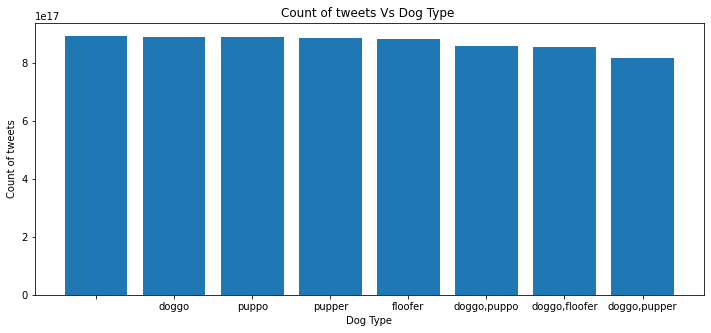

In [72]:
plt.figure(figsize=(12,5))
plt.bar(data=WeRateDogs_clean_anlyz,x=WeRateDogs_clean_anlyz['dog_type'],height=WeRateDogs_clean_anlyz.tweet_id)
plt.ylim=WeRateDogs_clean_anlyz.tweet_id.count().max()+10000
plt.xlabel('Dog Type')
plt.ylabel('Count of tweets');
plt.title('Count of tweets Vs Dog Type ');